반도체 8대 공정

1. 웨이퍼 공정

웨이퍼란? 반도체 직접회로를 만드는데 사용하는 재료

2. 산화 공정

웨이퍼 표면에 산화막을 형성해서 트렌지스터 기초를 만드는 과정

3. 포터 공정

웨이퍼 위에 반도체 회로를 그려 넣는 과정

4. 식각 공정

반도체 구조를 형성하는 패턴을 만드는 과정

5. 증착/이온 주입 공정

증착: 회로 구분 연결 보호 역할은 박막(thin film)을 만드는 과정
이온: 반도체 전기적 특성을 갖도록 만드는 과정

6. 급속 배정 공정

전기적 신혹사 잘 전달되도록 하는 과정

7. EDS 공정

검사를 과정

8. 패키징 공정

패키징하는 과정

In [335]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy.stats as st

import math

from statsmodels.stats.proportion import proportions_ztest

In [3]:
import pandas_profiling

In [4]:
mpl.rc('font', family = 'Malgun Gothic')
mpl.rc('axes', unicode_minus = True)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

C:\Users\user\AppData\Local\Temp/ipykernel_3548/3466516281.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [269]:
df_oxid = pd.read_csv('C:/Users/user/솔트룩스 작업 폴더/DATA/Oxid_000.csv')

In [248]:
df_oxid.head()

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime
0,1,Oxidation,dry,1138.979159,O2,32.80,0.200,62,699.443,NOLSM111,1,1,17-02-2019 PM 9:04:30
1,1,Oxidation,dry,1218.184551,O2,31.86,0.194,137,696.792,NOLSM212,1,2,17-02-2019 PM 9:04:30
2,1,Oxidation,dry,1062.467808,O2,39.51,0.217,128,705.471,NOLSM313,1,3,17-02-2019 PM 9:04:30
3,1,Oxidation,dry,1114.704773,O2,32.88,0.201,90,710.772,NOLSM414,1,4,17-02-2019 PM 9:04:30
4,1,Oxidation,dry,989.411946,O2,38.11,0.204,98,716.975,NOLSM515,1,5,17-02-2019 PM 9:04:30


In [8]:
df_oxid.shape

(852, 13)

In [9]:
df_oxid.columns

Index(['Ox_Chamber', 'process', 'type', 'Temp_OXid', 'Vapor', 'ppm',
       'Pressure', 'Oxid_time', 'thickness', 'No_Die', 'Lot_Num', 'Wafer_Num',
       'Datetime'],
      dtype='object')

<AxesSubplot:>

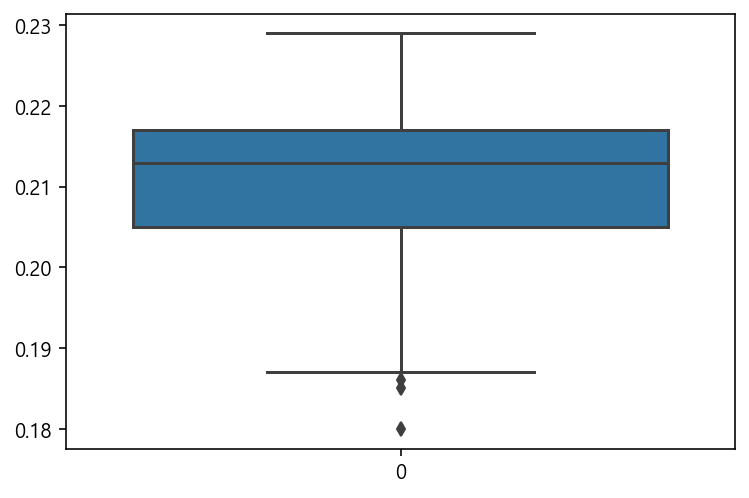

In [10]:
sns.boxplot(data = df_oxid['Pressure'])

<AxesSubplot:>

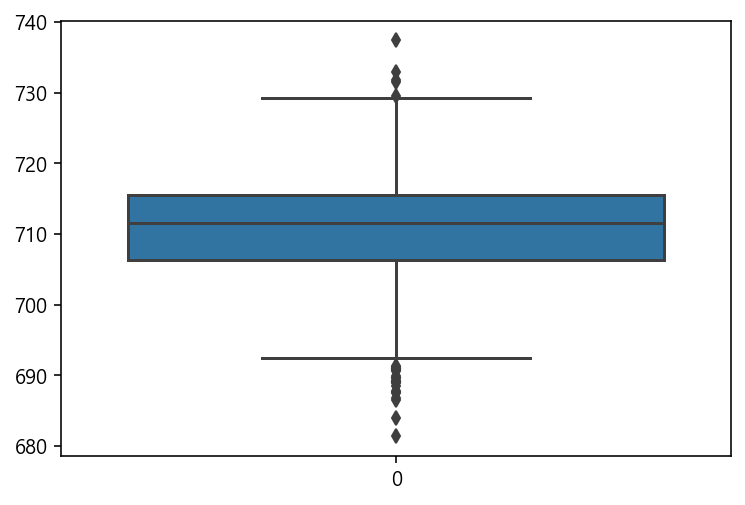

In [11]:
sns.boxplot(data = df_oxid['thickness'])

In [12]:
def IQR(data):
    q1,q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [249]:
pressure_outlier = IQR(df_oxid['Pressure'])[0]
thickness_outlier = IQR(df_oxid['thickness'])[0]

In [250]:
pressure_outlier

array([178, 361, 449], dtype=int64)

In [15]:
thickness_outlier

array([ 10,  82, 125, 129, 131, 148, 175, 176, 200, 204, 267, 275, 325,
       333, 357, 372, 378, 399, 407, 415, 416, 443, 455, 459, 460, 690,
       761, 762], dtype=int64)

In [270]:
for i in pressure_outlier:
    df_oxid.loc[i:i,['Pressure']] = np.NaN

In [271]:
for i in thickness_outlier:
    df_oxid.loc[i:i,['thickness']] = np.NaN

In [18]:
df_oxid.isnull().sum()

Ox_Chamber     0
process        0
type           0
Temp_OXid      0
Vapor          0
ppm            0
Pressure       3
Oxid_time      0
thickness     28
No_Die         0
Lot_Num        0
Wafer_Num      0
Datetime       0
dtype: int64

In [272]:
df_oxid = df_oxid.dropna(axis = 0).copy()

In [273]:
df_oxid.shape

(821, 13)

In [21]:
df_oxid[df_oxid['thickness'] < 700].loc[:,['thickness']].head()

,thickness
0,699.443
1,696.792
5,698.725
7,696.438
21,698.922


In [274]:
df_oxid['Reinforcement'] = df_oxid['thickness'].map(lambda x: False if x < 700 else True)

In [276]:
df_oxid.head()

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime,Reinforcement
0,1,Oxidation,dry,1138.979159,O2,32.80,0.200,62,699.443,NOLSM111,1,1,17-02-2019 PM 9:04:30,False
1,1,Oxidation,dry,1218.184551,O2,31.86,0.194,137,696.792,NOLSM212,1,2,17-02-2019 PM 9:04:30,False
2,1,Oxidation,dry,1062.467808,O2,39.51,0.217,128,705.471,NOLSM313,1,3,17-02-2019 PM 9:04:30,True
3,1,Oxidation,dry,1114.704773,O2,32.88,0.201,90,710.772,NOLSM414,1,4,17-02-2019 PM 9:04:30,True
4,1,Oxidation,dry,989.411946,O2,38.11,0.204,98,716.975,NOLSM515,1,5,17-02-2019 PM 9:04:30,True


In [277]:
pd.pivot_table(data = df_oxid, index = 'Reinforcement')

,Lot_Num,Ox_Chamber,Oxid_time,Pressure,Temp_OXid,Wafer_Num,ppm,thickness
Reinforcement,,,,,,,,
False,9.355932,2.067797,106.881356,0.207407,1085.770295,12.779661,34.363051,697.260203
True,16.954068,2.006562,125.157480,0.212005,1062.310996,14.043307,33.066509,712.510631


In [25]:
df_sb = pd.read_csv('C:/Users/user/솔트룩스 작업 폴더/DATA/Photo_Softbake_000.csv')

In [26]:
df_sb.head()

,Unnamed: 0,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,No_Die,Lot_Num,Wafer_Num,Datetime
0,0,1,Photo,1.211940,13.891,15.025,20.000,198.792,90.001,504.589,4082.622,5184.620,5.044,90.894,30.009,NOLSM111,1,1,17-02-2019 PM 9:04:30
1,1,1,Photo,0.887720,14.722,15.059,19.995,198.747,89.998,492.196,3960.739,5065.197,5.058,92.334,29.997,NOLSM212,1,2,17-02-2019 PM 9:04:30
2,2,1,Photo,1.113156,19.205,14.964,19.997,202.139,90.000,499.886,3981.691,4873.417,5.151,91.868,30.005,NOLSM313,1,3,17-02-2019 PM 9:04:30
3,3,2,Photo,0.882195,16.368,14.944,19.998,199.649,90.001,505.249,3922.191,5131.972,5.069,91.881,29.997,NOLSM414,1,4,17-02-2019 PM 9:04:30
4,4,2,Photo,0.834001,13.926,14.933,20.002,204.544,90.001,501.089,4124.099,5108.355,5.055,91.212,30.001,NOLSM515,1,5,17-02-2019 PM 9:04:30


In [355]:
df_lg = pd.read_csv('C:/Users/user/솔트룩스 작업 폴더/DATA/Photo_lithography_000.csv')

In [29]:
df_lg.head()

,lithography_Chamber,Line_CD,Lamp,UV_type,Wavelength,Resolution,Energy_Exposure,No_Die,Lot_Num,Wafer_Num,Datetime
0,1,30.959,Hg-Arc,H,405,516.657,109.769,NOLSM111,1,1,17-02-2019 PM 9:04:30
1,2,29.653,Hg-Arc,H,405,501.894,107.102,NOLSM212,1,2,17-02-2019 PM 9:04:30
2,3,28.063,Hg-Arc,I,365,506.750,110.471,NOLSM313,1,3,17-02-2019 PM 9:04:30
3,1,31.556,Hg-Arc,I,365,537.603,107.072,NOLSM414,1,4,17-02-2019 PM 9:04:30
4,2,31.969,Hg-Arc,I,365,560.574,108.073,NOLSM515,1,5,17-02-2019 PM 9:04:30


In [356]:
df_lg['Range_check'] = df_lg['Line_CD'].map(lambda x: False if (x < 25) | (x > 55) else True)

In [30]:
df_lg.loc[(df_lg['Line_CD'] < 25) | (df_lg['Line_CD'] > 55), 'Line_CD'] = False
df_lg.loc[(df_lg['Line_CD'] >= 25) & (df_lg['Line_CD'] <= 55), 'Line_CD'] = True

In [357]:
pd.crosstab(df_lg['Range_check'],df_lg['UV_type'])

UV_type,G,H,I
Range_check,,,
False,45,93,48
True,267,193,206


In [167]:
df_etc = pd.read_csv('C:/Users/user/솔트룩스 작업 폴더/DATA/Etching_000.csv')

In [168]:
df_etc.head(5)

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1
0,0,3,Etching,70.878,50.851,1.047,NOLSM111,1,1,17-02-2019 PM 9:04:30,251.0,267.06,303.82,361.38
1,1,2,Etching,69.561,52.283,1.051,NOLSM212,1,2,17-02-2019 PM 9:04:30,317.0,332.74,369.31,426.11
2,2,1,Etching,70.968,51.610,1.017,NOLSM313,1,3,17-02-2019 PM 9:04:30,411.0,424.21,460.65,517.80
3,3,1,Etching,70.146,51.286,1.027,NOLSM414,1,4,17-02-2019 PM 9:04:30,256.0,272.28,308.56,365.93
4,4,2,Etching,71.174,51.996,1.050,NOLSM515,1,5,17-02-2019 PM 9:04:30,419.0,434.98,471.65,528.85


In [169]:
df_etc.loc[df_etc['Thin Film 1'] <= 150,'Thin Film 1'] = np.NaN
df_etc.loc[df_etc['Thin Film 2'] <= 150,'Thin Film 2'] = np.NaN
df_etc.loc[df_etc['Thin Film 3'] <= 150,'Thin Film 3'] = np.NaN
df_etc.loc[df_etc['Thin Film 4'] <= 150,'Thin Film 4'] = np.NaN

In [172]:
df_etc = df_etc.dropna(axis = 0).copy()

In [173]:
df_etc.head()

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1
0,0,3,Etching,70.878,50.851,1.047,NOLSM111,1,1,17-02-2019 PM 9:04:30,251.0,267.06,303.82,361.38
1,1,2,Etching,69.561,52.283,1.051,NOLSM212,1,2,17-02-2019 PM 9:04:30,317.0,332.74,369.31,426.11
2,2,1,Etching,70.968,51.610,1.017,NOLSM313,1,3,17-02-2019 PM 9:04:30,411.0,424.21,460.65,517.80
3,3,1,Etching,70.146,51.286,1.027,NOLSM414,1,4,17-02-2019 PM 9:04:30,256.0,272.28,308.56,365.93
4,4,2,Etching,71.174,51.996,1.050,NOLSM515,1,5,17-02-2019 PM 9:04:30,419.0,434.98,471.65,528.85


In [174]:
df_etc['Etching_rate'] = (df_etc['Thin Film 1'] - df_etc['Thin Film 4']) / 30

In [175]:
df_etc.head()

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Etching_rate
0,0,3,Etching,70.878,50.851,1.047,NOLSM111,1,1,17-02-2019 PM 9:04:30,251.0,267.06,303.82,361.38,3.679333
1,1,2,Etching,69.561,52.283,1.051,NOLSM212,1,2,17-02-2019 PM 9:04:30,317.0,332.74,369.31,426.11,3.637000
2,2,1,Etching,70.968,51.610,1.017,NOLSM313,1,3,17-02-2019 PM 9:04:30,411.0,424.21,460.65,517.80,3.560000
3,3,1,Etching,70.146,51.286,1.027,NOLSM414,1,4,17-02-2019 PM 9:04:30,256.0,272.28,308.56,365.93,3.664333
4,4,2,Etching,71.174,51.996,1.050,NOLSM515,1,5,17-02-2019 PM 9:04:30,419.0,434.98,471.65,528.85,3.661667


In [176]:
df_impl = pd.read_csv('C:/Users/user/솔트룩스 작업 폴더/DATA/Implant_000.csv')

In [183]:
df_impl.iloc[:,2:7].head()

,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s
0,9.997373e+15,1.346079e+17,3.468281e+17,3.002593e+17,6.000007e+17
1,9.705928e+15,1.389326e+17,3.838008e+17,3.017903e+17,6.000012e+17
2,1.761358e+16,8.782248e+16,6.014497e+17,2.994231e+17,6.000002e+17
3,1.148303e+16,9.776566e+16,6.646884e+16,2.991354e+17,6.000003e+17
4,9.769204e+15,1.222219e+17,2.496090e+17,3.005576e+17,6.000013e+17


In [181]:
df_impl.shape

(839, 16)

In [179]:
for i in df_impl.iloc[:,2:7]:
    df_impl[df_impl[i] < 0 ] = np.NaN
df_impl = df_impl.dropna(axis = 0).copy()

In [207]:
df_insp = pd.read_csv('C:/Users/user/솔트룩스 작업 폴더/DATA/Inspect_000.csv')

In [218]:
df_insp.head()

,Target,No_Die,Lot_Num,Wafer_Num,Datetime,Error_message,Wafer_map
0,96,NOLSM111,1,1,02-18-2018,0,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
1,102,NOLSM212,1,2,02-18-2018,0,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
2,95,NOLSM313,1,3,02-18-2018,0,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
3,117,NOLSM414,1,4,02-18-2018,0,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...
4,143,NOLSM515,1,5,02-18-2018,0,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...


In [209]:
df_insp.loc[df_insp['Error_message'] != 'none','Error_message'] = 1
df_insp.loc[df_insp['Error_message'] == 'none','Error_message'] = 0

In [217]:
df_insp['Error_message'].value_counts()

0    786
1     66
Name: Error_message, dtype: int64

In [358]:
temp = [df_oxid, df_sb, df_lg, df_etc]
df1 = pd.merge(df_insp, df_impl, left_on = 'No_Die', right_on = 'No_Die', how = 'left')
for i in temp:
    df1 = pd.merge(df1, i, left_on = 'No_Die', right_on = 'No_Die', how = 'left')

C:\Users\user\AppData\Local\Temp/ipykernel_3548/1359963608.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Lot_Num_x', 'Wafer_Num_x', 'Datetime_x'} in the result is deprecated and will raise a MergeError in a future version.
  df1 = pd.merge(df1, i, left_on = 'No_Die', right_on = 'No_Die', how = 'left')


In [359]:
df1.shape

(852, 78)

In [360]:
df1 = df1.dropna(axis = 0)
df1.isnull().sum()

Target                 0
No_Die                 0
Lot_Num_x              0
Wafer_Num_x            0
Datetime_x             0
Error_message          0
Wafer_map              0
Chamber_Num            0
process4               0
Flux60s                0
Flux90s                0
Flux160s               0
Flux480s               0
Flux840s               0
input_Energy           0
Current                0
Temp_implantation      0
Furance_Temp           0
RTA_Temp               0
Lot_Num_y              0
Wafer_Num_y            0
Datetime_y             0
Ox_Chamber             0
process                0
type                   0
Temp_OXid              0
Vapor                  0
ppm                    0
Pressure               0
Oxid_time              0
thickness              0
Lot_Num_x              0
Wafer_Num_x            0
Datetime_x             0
Reinforcement          0
Unnamed: 0_x           0
photo_soft_Chamber     0
process 2              0
resist_target          0
N2_HMDS                0


In [288]:
for i in df1.columns:
    if 'Chamber' in i:
        print(i)

Chamber_Num
Ox_Chamber
photo_soft_Chamber
lithography_Chamber
Etching_Chamber


In [361]:
df1['Chamber_Route'] = 'route_' + df1['Ox_Chamber'].astype('int').astype('str') + df1['photo_soft_Chamber'].astype('int').astype('str') + df1['lithography_Chamber'].astype('int').astype('str') + df1['Etching_Chamber'].astype('int').astype('str') + df1['Chamber_Num'].astype('int').astype('str')

In [362]:
df1[['Chamber_Route']].head()

,Chamber_Route
0,route_11133
1,route_11222
2,route_11311
3,route_12111
4,route_12222


In [430]:
df2 = df1.drop(columns = ['Lot_Num_x', 'Wafer_Num_x', 'Datetime_x', 'Lot_Num_y', 'Wafer_Num_y', 'Datetime_y', 'Lamp', 'Wafer_map', 'Current'])
print(df2.shape)

(732, 58)


In [417]:
df1.shape

(732, 79)

In [316]:
df_oxid.head()

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime,Reinforcement
0,1,Oxidation,dry,1138.979159,O2,32.80,0.200,62,699.443,NOLSM111,1,1,17-02-2019 PM 9:04:30,False
1,1,Oxidation,dry,1218.184551,O2,31.86,0.194,137,696.792,NOLSM212,1,2,17-02-2019 PM 9:04:30,False
2,1,Oxidation,dry,1062.467808,O2,39.51,0.217,128,705.471,NOLSM313,1,3,17-02-2019 PM 9:04:30,True
3,1,Oxidation,dry,1114.704773,O2,32.88,0.201,90,710.772,NOLSM414,1,4,17-02-2019 PM 9:04:30,True
4,1,Oxidation,dry,989.411946,O2,38.11,0.204,98,716.975,NOLSM515,1,5,17-02-2019 PM 9:04:30,True


<AxesSubplot:xlabel='Reinforcement', ylabel='Oxid_time'>

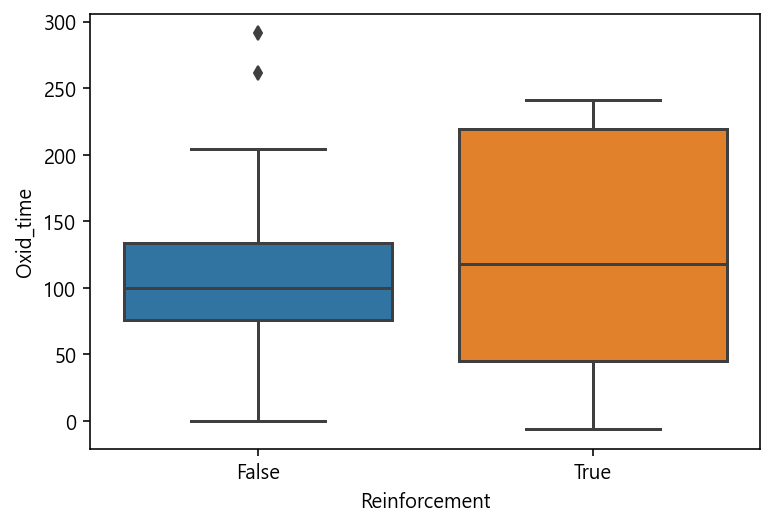

In [322]:
sns.boxplot(data = df_oxid, x = 'Reinforcement', y = 'Oxid_time')

In [333]:
df_temp = df_oxid

In [433]:
df_true = df1[df2['Reinforcement'] == True]
df_false = df1[df2['Reinforcement'] == False]

<AxesSubplot:xlabel='Oxid_time', ylabel='Count'>

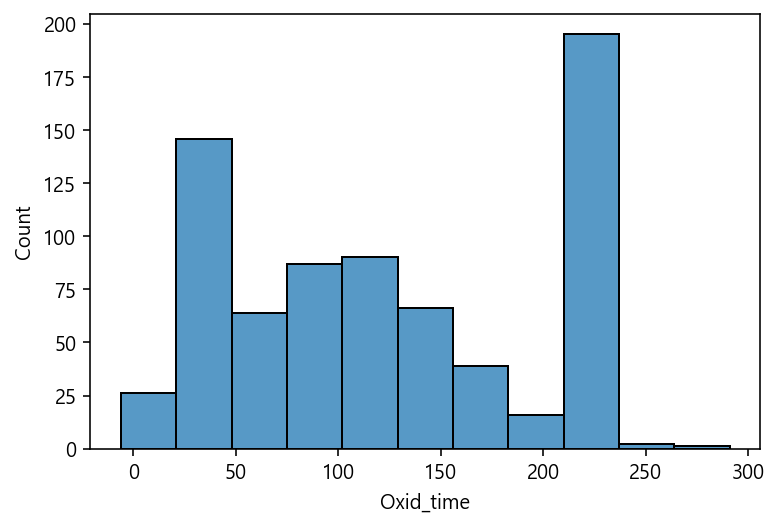

In [432]:
sns.histplot(data = df2, x = 'Oxid_time')

In [434]:
# 정규성 검정
x = st.shapiro(df_true['Oxid_time'])
print(x)
y = st.shapiro(df_false['Oxid_time'])
print(y)

ShapiroResult(statistic=0.8884432911872864, pvalue=1.1030756390982229e-21)
ShapiroResult(statistic=0.9405617117881775, pvalue=0.008209164254367352)


정규성 만족 X

In [435]:
# 비모수적 검정 Wilcoxon ranksum test
x = st.ranksums(df_true['Oxid_time'],df_false['Oxid_time'])
print(x)

RanksumsResult(statistic=1.1044632823206646, pvalue=0.2693922227721355)


x와 y의 데이터가 중앙값이 같은 연속 분포에서 추출된 표본이다

In [436]:
# 등분산 검정
stat, p = st.bartlett(df_true['Oxid_time'],df_false['Oxid_time'])
print('등분산검정결과 p-value는 %.7f' % p)

등분산검정결과 p-value는 0.0004563


등분산성 만족 X

In [437]:
# 2-Sample t-test
t_result = st.ttest_ind(df_true['Oxid_time'], df_false['Oxid_time'], equal_var = True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print( "2-Sample t-test ")
print( "t검정통계량: {} " .format(t))
print( "p-value: {} " .format(p))

2-Sample t-test 
t검정통계량: 1.407 
p-value: 0.16 


p-value = 0.16 > 0.05 귀무가설 채택
보강 여부에 따른 Oxidation Time 의 차이가 없다.

<AxesSubplot:xlabel='UV_type', ylabel='count'>

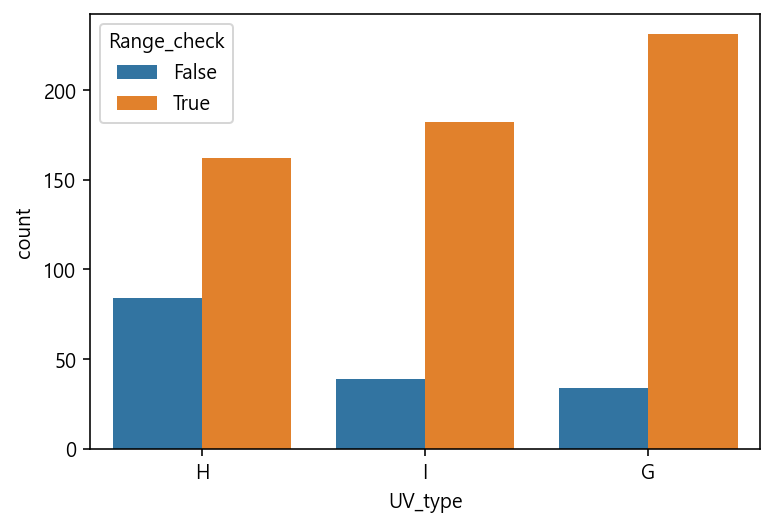

In [438]:
sns.countplot(data = df2, x = "UV_type",hue = "Range_check")

In [439]:
df_uv = pd.crosstab(df2['UV_type'],df2['Range_check'])

In [440]:
df_uv

Range_check,False,True
UV_type,,
G,34,231
H,84,162
I,39,182


In [441]:
st.chi2_contingency(df_uv)

(37.120667894033666,
 8.696597784548035e-09,
 2,
 array([[ 56.83743169, 208.16256831],
        [ 52.76229508, 193.23770492],
        [ 47.40027322, 173.59972678]]))

p-value = 2.4386538822204055e-07 < 0.05 귀무가설 기각.
UV Type에 따른 Out of Range의 유의미한 차이가 있다.

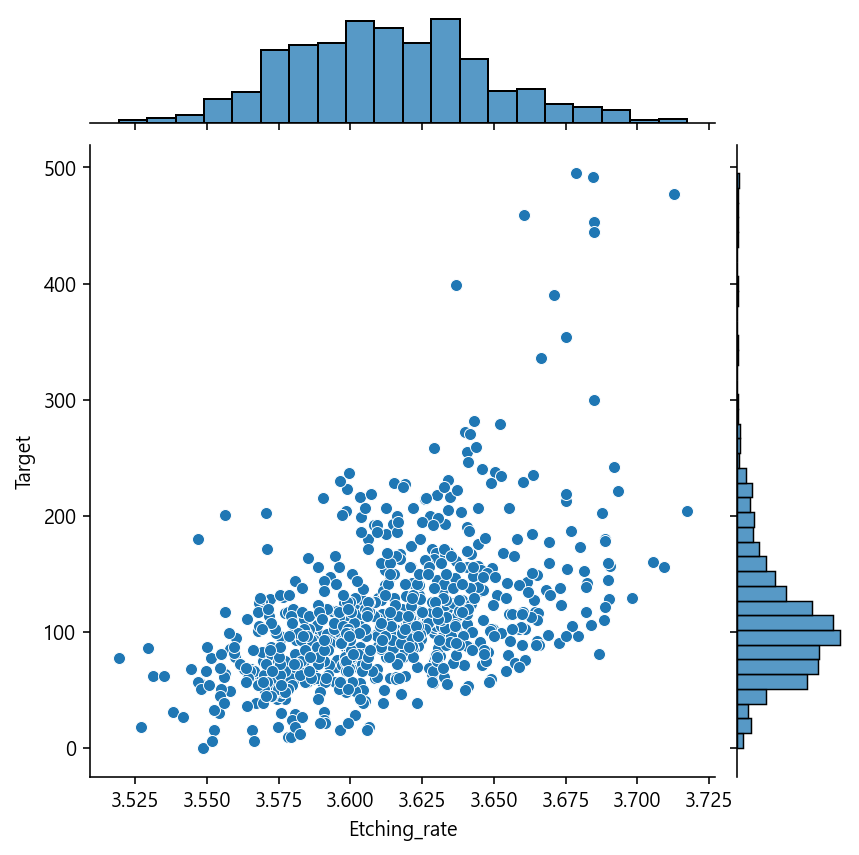

In [442]:
sns.jointplot(x = df2['Etching_rate'], y = df2['Target'])

In [488]:
Chamber_Route_count = df2[['Chamber_Route']].groupby(df2['Chamber_Route']).count()

In [489]:
Chamber_Route_count.columns = ['count']

In [492]:
Chamber_Route_count = Chamber_Route_count.reset_index()

In [494]:
Chamber_Route_count.head()

,Chamber_Route,count
0,route_11111,13
1,route_11133,12
2,route_11222,24
3,route_11311,16
4,route_11333,12


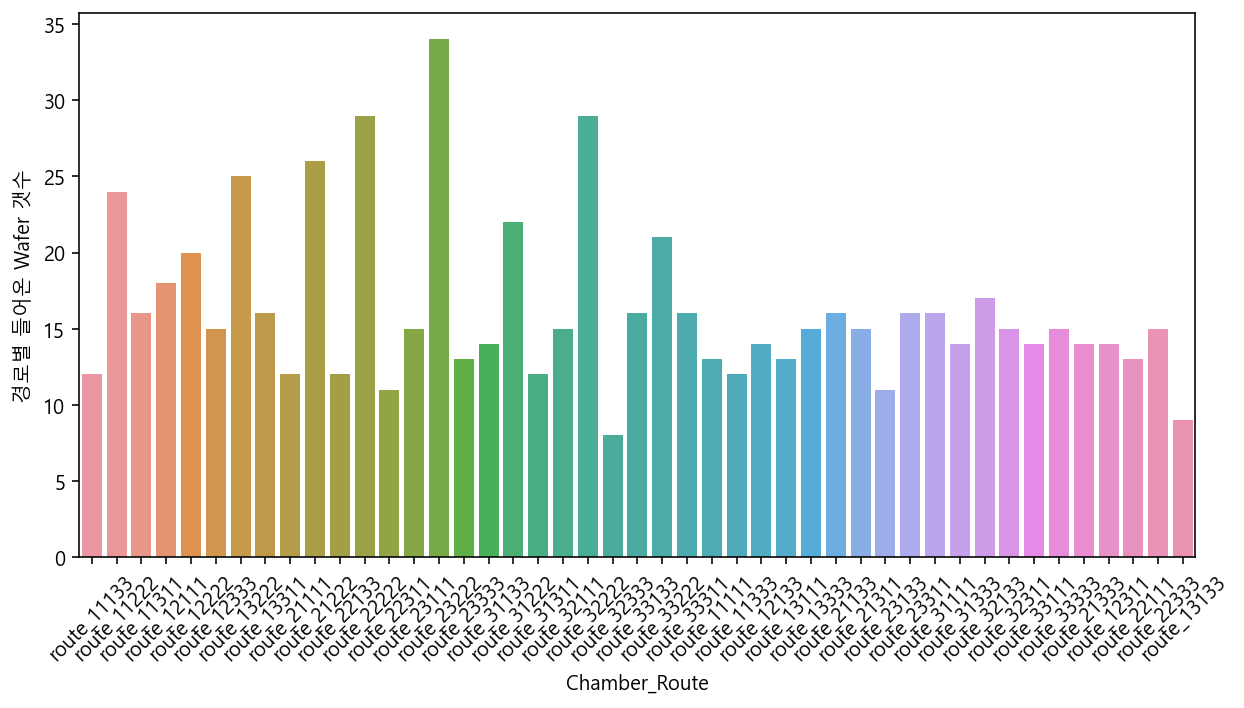

In [495]:
plt.figure(figsize = (10,5))
sns.countplot(data = df2 , x = 'Chamber_Route')
plt.xticks(rotation = 45)
plt.ylabel('경로별 들어온 Wafer 갯수')
plt.show()

In [509]:
Chamber_Route_error = pd.pivot_table(data = df2,index = 'Chamber_Route',values = 'Target' , aggfunc = 'sum')

In [518]:
Chamber_Route_error = Chamber_Route_error.reset_index()

In [519]:
Chamber_Route_error.sort_values(by = 'Target',ascending = False).head(10)

,Chamber_Route,Target
27,route_23222,3850
37,route_32222,3511
17,route_21222,3358
22,route_22222,3351
12,route_13222,2976
7,route_12222,2835
32,route_31222,2267
2,route_11222,2211
9,route_12333,2055
30,route_31111,2007


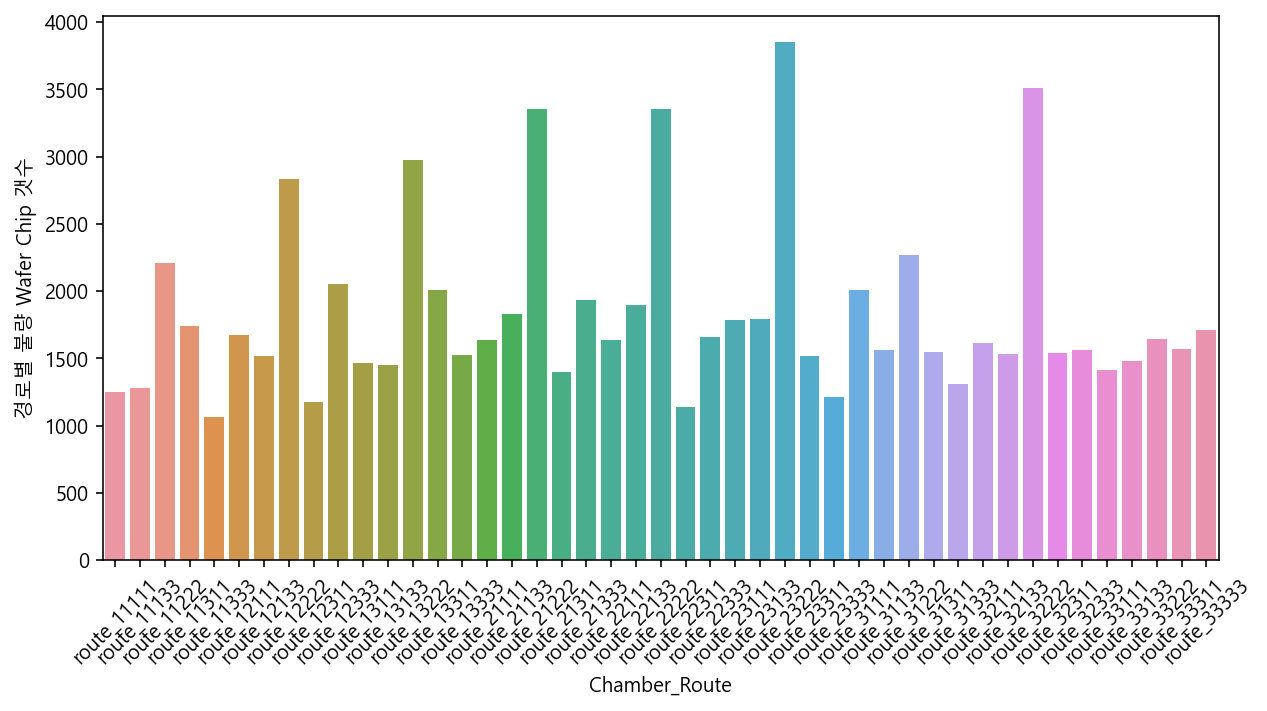

In [553]:
plt.figure(figsize = (10,5))
sns.barplot(data =  Chamber_Route_error, x = 'Chamber_Route', y = 'Target')
plt.xticks(rotation = 45)
plt.ylabel('경로별 불량 Wafer Chip 갯수')
plt.show()

In [544]:
Chamber_Route_Table = pd.merge(Chamber_Route_count,Chamber_Route_error)

In [547]:
Chamber_Route_Table.head()

,Chamber_Route,count,Target
0,route_11111,13,1248
1,route_11133,12,1279
2,route_11222,24,2211
3,route_11311,16,1742
4,route_11333,12,1061


In [548]:
Chamber_Route_Table['Error_Rate'] = (Chamber_Route_Table['Target']/ Chamber_Route_Table['count']).round(3) / 200

In [550]:
Chamber_Route_Table.sort_values(by = 'Error_Rate',ascending = False).head(10)

,Chamber_Route,count,Target,Error_Rate
39,route_32333,8,1561,0.975625
26,route_23133,11,1792,0.814545
11,route_13133,9,1452,0.806665
21,route_22133,12,1895,0.789585
7,route_12222,20,2835,0.708750
19,route_21333,14,1931,0.689645
9,route_12333,15,2055,0.685000
15,route_21111,12,1634,0.680835
17,route_21222,26,3358,0.645770
33,route_31311,12,1548,0.645000


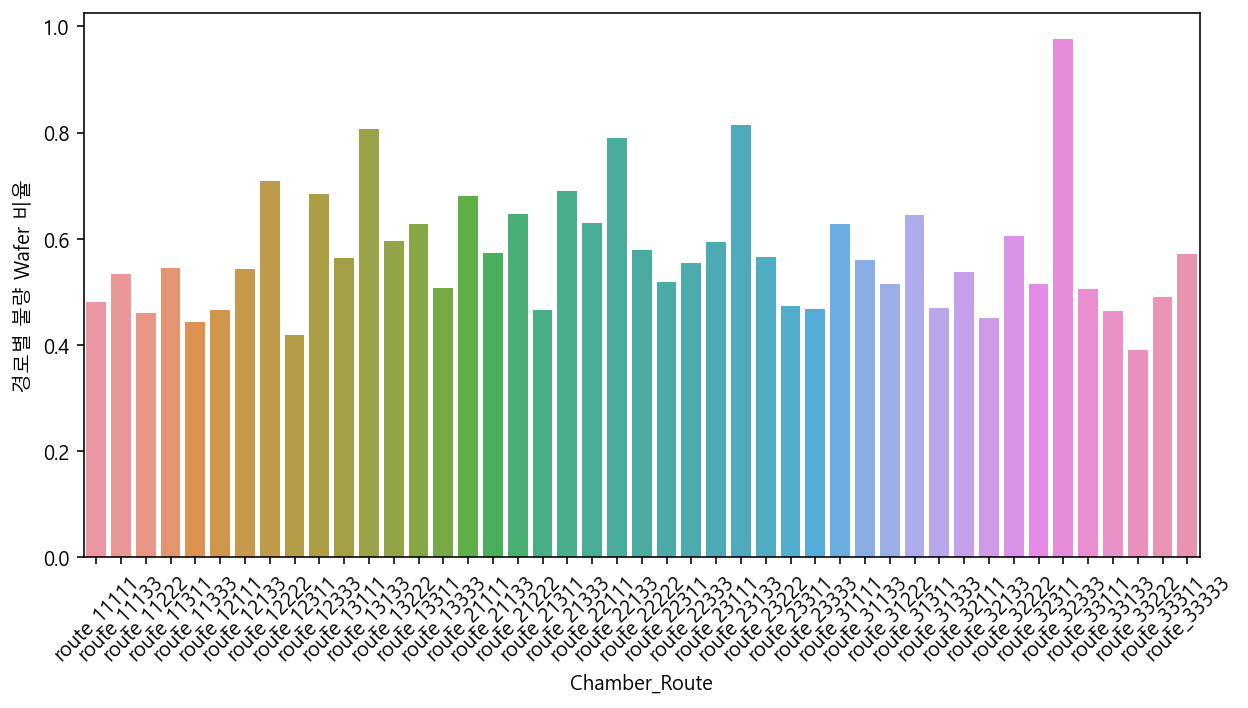

In [552]:
plt.figure(figsize = (10,5))
sns.barplot(data =  Chamber_Route_Table, x = 'Chamber_Route', y = 'Error_Rate')
plt.xticks(rotation = 45)
plt.ylabel('경로별 불량 Wafer 비율')
plt.show()

In [556]:
Chamber_Route_Table['과부화여부'] = Chamber_Route_Table['Error_Rate'].map(lambda x: '정상' if x <= 0.6 else '과부화')

In [559]:
Chamber_Route_Table['과부화여부'].value_counts()

정상     31
과부화    14
Name: 과부화여부, dtype: int64

In [560]:
Chamber_Route_Table.head(3)

,Chamber_Route,count,Target,Error_Rate,과부화여부
0,route_11111,13,1248,0.480000,정상
1,route_11133,12,1279,0.532915,정상
2,route_11222,24,2211,0.460625,정상


In [572]:
df3 = pd.merge(df2,Chamber_Route_Table, on = 'Chamber_Route', how = 'left')
print(df3.shape)
df3.head()

(732, 63)


,Target_x,No_Die,Error_message,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Reinforcement,Unnamed: 0_x,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,lithography_Chamber,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Range_check,Unnamed: 0_y,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Etching_rate,Chamber_Route,Error_Rate_x,count,Target_y,Error_Rate_y,과부화여부
0,96,NOLSM111,0,3.0,Implantation,9.997373e+15,1.346079e+17,3.468281e+17,3.002593e+17,6.000007e+17,31574.410,102.847,885.0,154.0,1.0,Oxidation,dry,1138.979159,O2,32.80,0.200,62.0,699.443,False,0,1,Photo,1.211940,13.891,15.025,20.000,198.792,90.001,504.589,4082.622,5184.620,5.044,90.894,30.009,1,30.959,H,405,516.657,109.769,True,0.0,3.0,Etching,70.878,50.851,1.047,251.0,267.06,303.82,361.38,3.679333,route_11133,0.480000,12,1279,0.532915,정상
1,102,NOLSM212,0,2.0,Implantation,9.705928e+15,1.389326e+17,3.838008e+17,3.017903e+17,6.000012e+17,31580.213,104.323,919.0,154.0,1.0,Oxidation,dry,1218.184551,O2,31.86,0.194,137.0,696.792,False,1,1,Photo,0.887720,14.722,15.059,19.995,198.747,89.998,492.196,3960.739,5065.197,5.058,92.334,29.997,2,29.653,H,405,501.894,107.102,True,1.0,2.0,Etching,69.561,52.283,1.051,317.0,332.74,369.31,426.11,3.637000,route_11222,0.532915,24,2211,0.460625,정상
2,95,NOLSM313,0,1.0,Implantation,1.761358e+16,8.782248e+16,6.014497e+17,2.994231e+17,6.000002e+17,32162.414,100.605,916.0,155.0,1.0,Oxidation,dry,1062.467808,O2,39.51,0.217,128.0,705.471,True,2,1,Photo,1.113156,19.205,14.964,19.997,202.139,90.000,499.886,3981.691,4873.417,5.151,91.868,30.005,3,28.063,I,365,506.750,110.471,True,2.0,1.0,Etching,70.968,51.610,1.017,411.0,424.21,460.65,517.80,3.560000,route_11311,0.460625,16,1742,0.544375,정상
3,117,NOLSM414,0,1.0,Implantation,1.148303e+16,9.776566e+16,6.646884e+16,2.991354e+17,6.000003e+17,32874.925,101.739,911.0,156.0,1.0,Oxidation,dry,1114.704773,O2,32.88,0.201,90.0,710.772,True,3,2,Photo,0.882195,16.368,14.944,19.998,199.649,90.001,505.249,3922.191,5131.972,5.069,91.881,29.997,1,31.556,I,365,537.603,107.072,True,3.0,1.0,Etching,70.146,51.286,1.027,256.0,272.28,308.56,365.93,3.664333,route_12111,0.544375,18,1677,0.465835,정상
4,143,NOLSM515,0,2.0,Implantation,9.769204e+15,1.222219e+17,2.496090e+17,3.005576e+17,6.000013e+17,30985.928,106.422,872.0,155.0,1.0,Oxidation,dry,989.411946,O2,38.11,0.204,98.0,716.975,True,4,2,Photo,0.834001,13.926,14.933,20.002,204.544,90.001,501.089,4124.099,5108.355,5.055,91.212,30.001,2,31.969,I,365,560.574,108.073,True,4.0,2.0,Etching,71.174,51.996,1.050,419.0,434.98,471.65,528.85,3.661667,route_12222,0.442085,20,2835,0.708750,과부화


<AxesSubplot:xlabel='과부화여부', ylabel='count'>

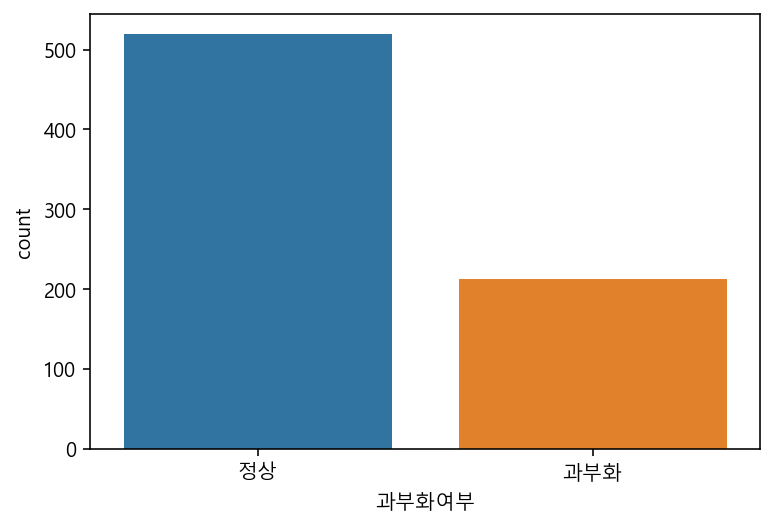

In [573]:
sns.countplot(data = df3, x = '과부화여부')

<AxesSubplot:xlabel='thickness', ylabel='Count'>

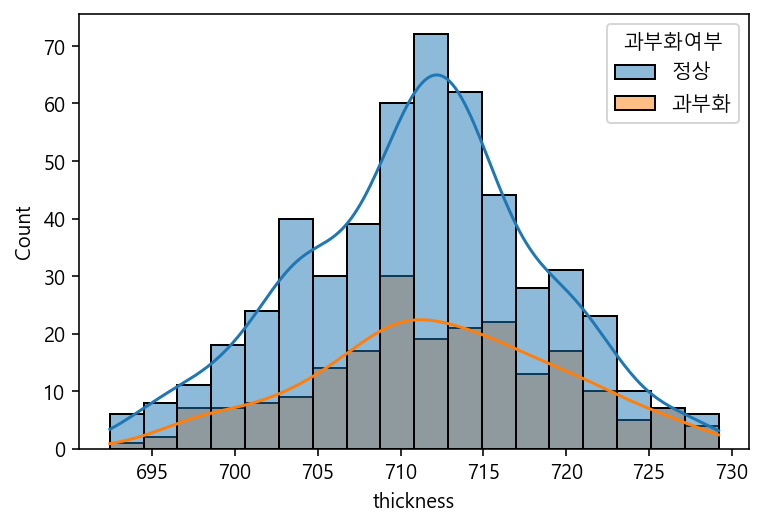

In [574]:
sns.histplot(data = df3, x = 'thickness',hue = '과부화여부', kde = True)

<AxesSubplot:xlabel='resist_target', ylabel='Count'>

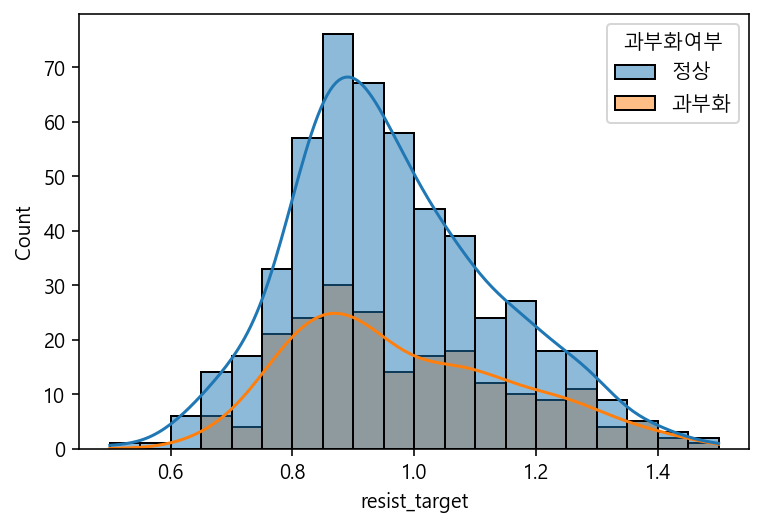

In [575]:
sns.histplot(data = df3, x = 'resist_target',hue = '과부화여부', kde = True)

<AxesSubplot:xlabel='Etching_rate', ylabel='Count'>

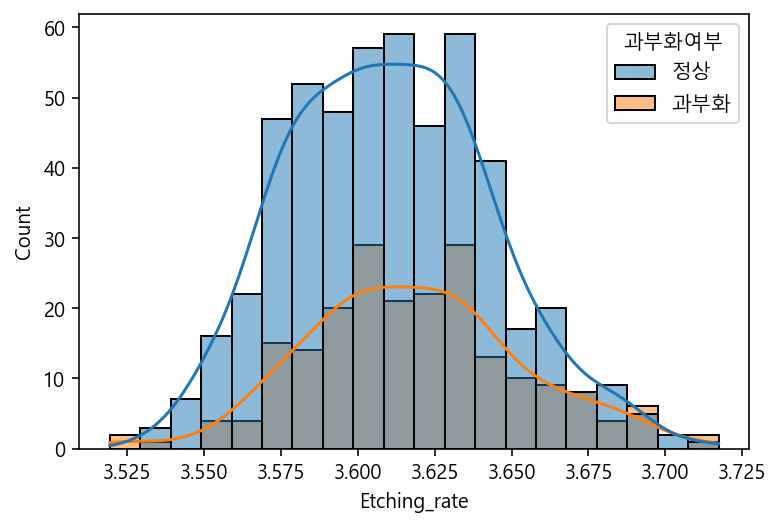

In [576]:
sns.histplot(data = df3, x = 'Etching_rate',hue = '과부화여부', kde = True)

In [582]:
df_all_numeric = df3[['ppm', 'Pressure', 'Oxid_time', 'thickness', 'resist_target', 
                      'N2_HMDS', 'pressure_HMDS', 'temp_HMDS', 'temp_HMDS_bake', 'time_HMDS_bake', 
                      'spin1', 'spin2', 'spin3', 'photoresist_bake', 'temp_softbake', 'time_softbake', 
                      'Line_CD', 'Resolution', 'Energy_Exposure', 'Temp_Etching', 'Source_Power', 
                     'Selectivity', 'Etching_rate', 'Flux60s', 'Flux90s', 'Flux160s', 'Flux480s', 'Flux840s',
                     'input_Energy', 'Temp_implantation', 'Furance_Temp', 'RTA_Temp','Target_x', 'Error_Rate_x',
                      '과부화여부']]

In [ ]:
sns.pairplot(df_all_numeric)